# Investigating Breakfast Cereals

We use neural networks to investigate the nutritional value of different breakfast cereals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
cereals = pd.read_table("cereals.txt")

Dataset description from http://lib.stat.cmu.edu/DASL/Datafiles/Cereals.html:

 A value of -1 for nutrients indicates a missing observation.
Number of cases: 77
Variable Names:

    Name: Name of cereal
    mfr: Manufacturer of cereal where A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina
    type: cold or hot
    calories: calories per serving
    protein: grams of protein
    fat: grams of fat
    sodium: milligrams of sodium
    fiber: grams of dietary fiber
    carbo: grams of complex carbohydrates
    sugars: grams of sugars
    potass: milligrams of potassium
    vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
    shelf: display shelf (1, 2, or 3, counting from the floor)
    weight: weight in ounces of one serving
    cups: number of cups in one serving
    rating: a rating of the cereals 

In [8]:
pd.set_option('display.max_columns', 50)
display(cereals)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,0,0,0,1,0,0,0,1,0
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,0,0,0,0,0,1,0,1,0
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,0,0,1,0,0,0,0,1,0
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,0,0,1,0,0,0,0,1,0
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,0,1,0,0,0,0,0,1,0
73,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,0,1,0,0,0,0,0,1,0
74,Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,0,0,0,0,0,0,1,1,0
75,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,0,1,0,0,0,0,0,1,0


The following gives us an overview of some data statistics:

In [6]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


The '-1' markers for missing values are taken for legitimate values. Thus, the minimum sugar content in this table is actually listed as -1.00. This distorts the statistics, and will lead to problems in learning. We therefore replace the -1 markers for missing values with numpy NaN values:

In [5]:
cereals[cereals == -1] = np.nan

Rerunning `cereals.describe()` above shows how that affects the computation of the statistics. 

Before we can use neural networks, we have to transform the categorical 'Manufacturer' and 'Type' attributes using a one-hot encoding. This is easily done using the `get_dummies` method in Pandas:

In [7]:
cereals = pd.get_dummies(cereals,columns = ['mfr','type'])

Check how that has changed the picture of the data we get above from `display(cereals)`. 

The dataset does not yet consist of separate 'data' and 'target' variables. We have to decide that 'rating' is the class label we want to predict, and divide the data accordingly (we also delete the 'name' attribute, since it makes no sense to use identifiers as predictors): 

In [9]:
Y = cereals['rating']
X = cereals.drop(['name','rating'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

We first try to learn a simple perceptron model:

In [10]:
mlp = MLPRegressor(hidden_layer_sizes=[],solver='lbfgs').fit(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

This doesn't work! The NaN values are causing problems! We replace NaN values with the column means using the Pandas fillna() function. This is **NOT NICE** (but probably still better than the original -1 values)!

In [11]:
X=X.fillna(X.mean())

In [12]:
display(X)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,0,0,0,1,0,0,0,1,0
1,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,0,0,0,0,0,1,0,1,0
2,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,0,0,1,0,0,0,0,1,0
3,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,0,0,1,0,0,0,0,1,0
4,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,0,1,0,0,0,0,0,1,0
73,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,0,1,0,0,0,0,0,1,0
74,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,0,0,0,0,0,0,1,1,0
75,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,0,1,0,0,0,0,0,1,0


We try again:

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
mlp = MLPRegressor(hidden_layer_sizes=[],solver='lbfgs',max_iter=200).fit(X_train, Y_train)

/home/jaeger/anaconda3/envs/plain/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


We investigate the accuracy of the learned model by computing the squared error, and plotting true against predicted values:

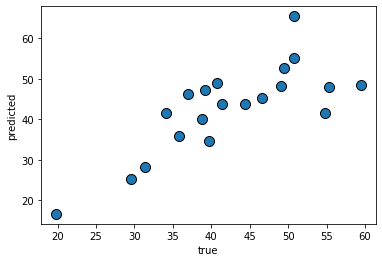

Mean squared error: 47.004377944561426


In [14]:
O=mlp.predict(X_test)
mglearn.discrete_scatter(Y_test,O)
plt.xlabel("true")
plt.ylabel("predicted")
plt.show()
print("Mean squared error: {}".format(mean_squared_error(Y_test,O)))

We investigate the weights of the perceptron:

In [15]:
for i,c in enumerate(mlp.coefs_[0]):
    print("{}: \t{}".format(X.columns.values[i],c[0]))    
    


calories: 	-0.31265080007941654
protein: 	5.057806360614692
fat: 	-0.3710717273306696
sodium: 	-0.049247992343569344
fiber: 	6.552576946125017
carbo: 	2.7754498376980723
sugars: 	0.6070660111091412
potass: 	-0.1169587151550474
vitamins: 	-0.12378985373349408
shelf: 	1.9378536137870457
weight: 	1.2781411638843403
cups: 	6.804931623069316
mfr_A: 	-0.14470754069669348
mfr_G: 	1.4973839245531482
mfr_K: 	-2.469517901310392
mfr_N: 	3.7205634576821724
mfr_P: 	0.40290897989028207
mfr_Q: 	5.132641828206144
mfr_R: 	-0.5504038607860264
type_C: 	7.265037676568827
type_H: 	0.8169980754362383


The weights can be used to assess the importance of different input features. Features with larger weights, will influence the output more than features with smaller weights. However, this has to be seen in conjunction with the numerical scale of the feature values. Compare e.g. the weights and feature value range of the 'cups' and 'potass' features. 

Weight values are more informative when features are scaled to the same range. This can also improve learning results:

## Feature normalization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_norm_train=scaler.transform(X_train)
X_norm_test=scaler.transform(X_test)
display(X_norm_train)

array([[-0.8227906 , -0.46803183, -0.92401266, ..., -0.27472113,
         0.13363062, -0.13363062],
       [-2.81849546, -0.46803183, -0.92401266, ..., -0.27472113,
         0.13363062, -0.13363062],
       [ 0.17506183, -0.46803183,  1.06348627, ...,  3.64005494,
         0.13363062, -0.13363062],
       ...,
       [ 1.67184047,  0.55803795,  0.0697368 , ..., -0.27472113,
         0.13363062, -0.13363062],
       [ 0.67398804,  0.55803795,  1.06348627, ..., -0.27472113,
         0.13363062, -0.13363062],
       [-0.8227906 ,  0.55803795, -0.92401266, ..., -0.27472113,
         0.13363062, -0.13363062]])

By the scaling operation we 'loose' the Pandas DataFrame structure. Note that how the scaling is done is determined by the training data only. The same scaling operation then is applied also to the test data.

Now we can learn again with the scaled data:

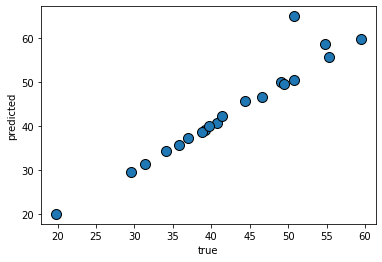

Mean squared error: 10.881012465334328


In [18]:
mlp = MLPRegressor(hidden_layer_sizes=[],solver='lbfgs',max_iter=200).fit(X_norm_train, Y_train)
O=mlp.predict(X_norm_test)
mglearn.discrete_scatter(Y_test,O)
plt.xlabel("true")
plt.ylabel("predicted")
plt.show()
print("Mean squared error: {}".format(mean_squared_error(Y_test,O)))

With the scaled data, accuracy is better! We can now again look at feature importance:

In [19]:
for i,c in enumerate(mlp.coefs_[0]):
    print("{}: \t{}".format(X.columns.values[i],c[0]))   

calories: 	-4.8494281951119556
protein: 	3.1754092132356155
fat: 	-1.598340239580416
sodium: 	-4.390487143280737
fiber: 	8.10735627455656
carbo: 	3.9938091259358592
sugars: 	-3.48369801623405
potass: 	-2.334286696856621
vitamins: 	-1.1347483975793196
shelf: 	0.12251998108899832
weight: 	0.36803678770293385
cups: 	-0.025429640325292855
mfr_A: 	-0.3027116504220216
mfr_G: 	-0.31336322357795005
mfr_K: 	-0.23519554781884122
mfr_N: 	-0.10146825379494032
mfr_P: 	-0.2193514540396051
mfr_Q: 	-0.2727663926699295
mfr_R: 	0.13238762297647602
type_C: 	-0.5722757238778962
type_H: 	-0.15155304378944112


This makes more sense: fiber is good, sugars are bad, and cups do not matter!

We compare the accuracy of the learned model as a function of the 'max_iter' hyperparameter when learning from the original and the normalized data:

In [20]:
iters=np.arange(100,4000,200)
loss_orig = np.zeros(iters.size)
loss_norm = np.zeros(iters.size)
loss_orig_deep = np.zeros(iters.size)
loss_norm_deep = np.zeros(iters.size)
for i,it in enumerate(iters):
    mlp = MLPRegressor(hidden_layer_sizes=[],solver='lbfgs',max_iter=it).fit(X_train, Y_train)
    O=mlp.predict(X_test)
    loss_orig[i]=mean_squared_error(Y_test,O)
    mlp = MLPRegressor(hidden_layer_sizes=[],solver='lbfgs',max_iter=it).fit(X_norm_train, Y_train)
    O=mlp.predict(X_norm_test)
    loss_norm[i]=mean_squared_error(Y_test,O)
    mlp = MLPRegressor(hidden_layer_sizes=[10,10],solver='lbfgs',max_iter=it).fit(X_train, Y_train)
    O=mlp.predict(X_test)
    loss_orig_deep[i]=mean_squared_error(Y_test,O)
    mlp = MLPRegressor(hidden_layer_sizes=[10,10],solver='lbfgs',max_iter=it).fit(X_norm_train, Y_train)
    O=mlp.predict(X_norm_test)
    loss_norm_deep[i]=mean_squared_error(Y_test,O)

/home/jaeger/anaconda3/envs/plain/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jaeger/anaconda3/envs/plain/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jaeger/anaconda3/envs/plain/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lb

/home/jaeger/anaconda3/envs/plain/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jaeger/anaconda3/envs/plain/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jaeger/anaconda3/envs/plain/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lb

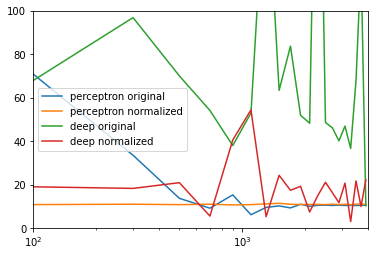

In [21]:
plt.plot(iters,loss_orig,label='perceptron original')
plt.plot(iters,loss_norm,label='perceptron normalized')
plt.plot(iters,loss_orig_deep,label='deep original')
plt.plot(iters,loss_norm_deep,label='deep normalized')
plt.xscale('log')
plt.axis([100, 4000, 0, 100])
plt.legend()
plt.show()

We see that for the perceptron, the normalization mainly helps to find a good model faster. If we allow sufficiently many iterations, then the perceptron will also become accurate on the un-normalized data. For the 'deep' model we observe quite a lot of variability in the results, due to the different degrees of overfitting in different runs. Normalizing helps a little bit to bring this variability down. The main insight we can get here, however, is that the deep model is too complex for this dataset.